## Part 1 : ETL and Cleaning Data

#### Importing Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import re
from scipy import stats
import seaborn as sns
from statistics import mode
from sklearn import preprocessing    
from zipfile import ZipFile
from io import BytesIO
import urllib
from urllib.request import urlopen
%matplotlib inline
matplotlib.style.use('ggplot')

#### Function to Extract and download the Data from the database url

In [2]:
def DataLoadExtract(url):
    zipfile = ZipFile(BytesIO(url.read()))
    df = pd.read_csv(zipfile.open('LoanStats3a.csv'), low_memory=False)
    return df

In [3]:
data_url = urlopen("https://resources.lendingclub.com/LoanStats3a.csv.zip")
df = DataLoadExtract(data_url)

In [4]:
df.shape

(42539, 1)

### Inconsistent and Unstructured Dataset with Merged Columns

In [5]:
df.head(2).T

,id,NaN
,member_id,NaN
,loan_amnt,5000
,funded_amnt,5000
,funded_amnt_inv,4975
,term,36 months
,int_rate,10.65%
,installment,162.87
,grade,B
,sub_grade,B2
,emp_title,NaN


In [6]:
a=df.head(1).T

In [7]:
a=str(a)

In [8]:
a=a.replace(" ","")

In [9]:
a=a.split('\n')

In [10]:
a=np.array(a)

In [11]:
fields=np.delete(a,-1)

In [12]:
data=pd.read_csv('C:/Users/aksha/Downloads/LoanStats3anew/LoanStats3a.csv',low_memory=False,names=fields)

In [13]:
data.shape

(42540, 144)

In [14]:
data.drop(data.index[[0,1]],axis=0,inplace=True)

In [15]:
#data.head(2).T

In [16]:
data.shape

(42538, 144)

### Function to provide a NaNs summary

In [17]:
def nanSummary(dataset):
    summary={}
    
    nanS=dataset.isnull().sum().sort_values(ascending=False)
    for key in nanS.keys():
        if nanS[key] > 0:
            summary[key]=nanS[key]
            
    if summary == {}:
        summary='Data is now Clean'    
        
    return summary        

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42538 entries, 2 to 42539
Columns: 144 entries, id to settlement_percentage
dtypes: object(144)
memory usage: 47.1+ MB


In [19]:
nanSdata=nanSummary(data)

###  The feature vectors which had more than half of missing data were dropped instead of imputing  because imputing more than half the data may lead to unrealistic fallible predictions or objectional consequences.


In [20]:
drop_fields=[]
for field in nanSdata.keys():
    if nanSdata[field] >= 0.50*(data.shape[0]):
        drop_fields.append(field)         

In [21]:
len(drop_fields)

90

In [22]:
type(drop_fields)

list

In [23]:
data.drop(columns=drop_fields,inplace=True,axis=1)

In [24]:
data.shape

(42538, 54)

In [25]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
2,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,1,Individual,0,0,0,0,0,N,Cash,N
3,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1,Individual,0,0,0,0,0,N,Cash,N
4,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,1,Individual,0,0,0,0,0,N,Cash,N
5,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,1,Individual,0,0,0,0,0,N,Cash,N
6,3000,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,1,Individual,0,0,0,0,0,N,Cash,N


In [26]:
data['term'].replace('[^0-9]+', value='' , inplace=True, regex=True)

In [27]:
data['int_rate'].replace('%', value='' , inplace=True, regex=True)
data['revol_util'].replace('%', value='' , inplace=True, regex=True)

In [28]:
data['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)


In [29]:
nanSummary(data)

{'acc_now_delinq': 32,
 'addr_state': 3,
 'annual_inc': 7,
 'application_type': 3,
 'chargeoff_within_12_mths': 148,
 'collection_recovery_fee': 3,
 'collections_12_mths_ex_med': 148,
 'debt_settlement_flag': 3,
 'delinq_2yrs': 32,
 'delinq_amnt': 32,
 'desc': 13296,
 'disbursement_method': 3,
 'dti': 3,
 'earliest_cr_line': 32,
 'emp_length': 1115,
 'emp_title': 2629,
 'funded_amnt': 3,
 'funded_amnt_inv': 3,
 'grade': 3,
 'hardship_flag': 3,
 'home_ownership': 3,
 'initial_list_status': 3,
 'inq_last_6mths': 32,
 'installment': 3,
 'int_rate': 3,
 'issue_d': 3,
 'last_credit_pull_d': 7,
 'last_pymnt_amnt': 3,
 'last_pymnt_d': 86,
 'loan_amnt': 3,
 'loan_status': 3,
 'open_acc': 32,
 'out_prncp': 3,
 'out_prncp_inv': 3,
 'policy_code': 3,
 'pub_rec': 32,
 'pub_rec_bankruptcies': 1368,
 'purpose': 3,
 'pymnt_plan': 3,
 'recoveries': 3,
 'revol_bal': 3,
 'revol_util': 93,
 'sub_grade': 3,
 'tax_liens': 108,
 'term': 3,
 'title': 16,
 'total_acc': 32,
 'total_pymnt': 3,
 'total_pymnt_inv

### With the help of covariance metrics and data visualization techniques.I made an educated assumption that these features below are adding noise to the dataset and not helping in improving predictions   

In [32]:
less_info_vars=['desc','title','zip_code','earliest_cr_line','open_acc',
                'out_prncp_inv','recoveries','collection_recovery_fee',
                'last_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med',
                'policy_code','application_type','acc_now_delinq',
                'chargeoff_within_12_mths','pub_rec_bankruptcies','tax_liens',
                'hardship_flag','disbursement_method','issue_d','pymnt_plan',
                'delinq_amnt','total_pymnt','initial_list_status','debt_settlement_flag',
               'out_prncp']
                

In [33]:
new_data=data.drop(columns=less_info_vars,axis=1)

In [34]:
new_data.shape

(42538, 28)

In [35]:
new_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt
2,5000,5000,4975,36,10.65,162.87,B,B2,NaN,10,...,1,0,13648,83.7,9,5833.84,5000.00,863.16,0.0,171.62
3,2500,2500,2500,60,15.27,59.83,C,C4,Ryder,1,...,5,0,1687,9.4,4,1014.53,456.46,435.17,0.0,119.66
4,2400,2400,2400,36,15.96,84.33,C,C5,NaN,10,...,2,0,2956,98.5,10,3005.67,2400.00,605.67,0.0,649.91
5,10000,10000,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,1,0,5598,21,37,12231.89,10000.00,2214.92,16.97,357.48
6,3000,3000,3000,60,12.69,67.79,B,B5,University Medical Group,1,...,0,0,27783,53.9,38,4066.91,3000.00,1066.91,0.0,67.3


In [36]:
new_data=new_data.dropna(subset=['emp_title'])

In [37]:
new_data.shape

(39909, 28)

In [38]:
nanSummary(new_data)

{'delinq_2yrs': 17,
 'emp_length': 57,
 'inq_last_6mths': 17,
 'pub_rec': 17,
 'revol_util': 74,
 'total_acc': 17}

In [39]:
new_data.head().T

,3,5,6,7,8
loan_amnt,2500,10000,3000,5000,7000
funded_amnt,2500,10000,3000,5000,7000
funded_amnt_inv,2500,10000,3000,5000,7000
term,60,36,60,36,60
int_rate,15.27,13.49,12.69,7.90,15.96
installment,59.83,339.31,67.79,156.46,170.08
grade,C,C,B,A,C
sub_grade,C4,C1,B5,A4,C5
emp_title,Ryder,AIR RESOURCES BOARD,University Medical Group,Veolia Transportaton,Southern Star Photography
emp_length,1,10,1,3,8


In [40]:
new_data2=new_data.copy()

## Generating Consistent Data Types for the Data

In [41]:
for key in new_data.keys():
    try:
        new_data2[key]=new_data[key].astype(float)
        
    except Exception as e:
        
        if hasattr(e, 'message'):
            
            print(e.message)
        else:
            print(e)
        pass

could not convert string to float: 'A'
could not convert string to float: 'A3'
could not convert string to float: 'Homemaker'
could not convert string to float: 'MORTGAGE'
could not convert string to float: 'Not Verified'
could not convert string to float: 'Does not meet the credit policy. Status:Fully Paid'
could not convert string to float: 'other'
could not convert string to float: 'CT'


In [42]:
new_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39909 entries, 3 to 42537
Data columns (total 28 columns):
loan_amnt              39909 non-null float64
funded_amnt            39909 non-null float64
funded_amnt_inv        39909 non-null float64
term                   39909 non-null float64
int_rate               39909 non-null float64
installment            39909 non-null float64
grade                  39909 non-null object
sub_grade              39909 non-null object
emp_title              39909 non-null object
emp_length             39852 non-null float64
home_ownership         39909 non-null object
annual_inc             39909 non-null float64
verification_status    39909 non-null object
loan_status            39909 non-null object
purpose                39909 non-null object
addr_state             39909 non-null object
dti                    39909 non-null float64
delinq_2yrs            39892 non-null float64
inq_last_6mths         39892 non-null float64
pub_rec                39

In [43]:
nanSummary(new_data2)

{'delinq_2yrs': 17,
 'emp_length': 57,
 'inq_last_6mths': 17,
 'pub_rec': 17,
 'revol_util': 74,
 'total_acc': 17}

### 	The missing data was treated using data imputation techniques by filling NaN values (mean,mode) depending on the type of the feature range.

In [44]:
def dataImputer(dataset):
    imputedData=[]
    high_freq_keys=['delinq_2yrs','pub_rec','inq_last_6mths','emp_length']
    cont_rand_keys=['revol_util', 'total_acc']
    for key in cont_rand_keys:
        dataset[key]=dataset[key].fillna(np.nanmean(dataset[key]))
     
    for key in high_freq_keys:
        dataset[key]=dataset[key].fillna(mode(dataset[key]))
    imputedData=dataset
    
    return imputedData

In [45]:
clean_data=dataImputer(new_data2)

In [46]:
nanSummary(clean_data)

'Data is now Clean'

In [47]:
g = clean_data.columns.to_series().groupby(clean_data.dtypes).groups

In [48]:
a={k.name: v for k, v in g.items()}
categList=a['object']
numericList=a['float64']
print(categList)
print(numericList)

Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'addr_state'],
      dtype='object')
Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_amnt'],
      dtype='object')


In [49]:
clean_data=clean_data.reset_index()
#new_data2.head()

In [50]:
numericData=clean_data[numericList]
numericData.head().T

,0,1,2,3,4
loan_amnt,2500.00,10000.00,3000.00,5000.00,7000.00
funded_amnt,2500.00,10000.00,3000.00,5000.00,7000.00
funded_amnt_inv,2500.00,10000.00,3000.00,5000.00,7000.00
term,60.00,36.00,60.00,36.00,60.00
int_rate,15.27,13.49,12.69,7.90,15.96
installment,59.83,339.31,67.79,156.46,170.08
emp_length,1.00,10.00,1.00,3.00,8.00
annual_inc,30000.00,49200.00,80000.00,36000.00,47004.00
dti,1.00,20.00,17.94,11.20,23.51
delinq_2yrs,0.00,0.00,0.00,0.00,0.00


In [76]:
# Treating Outlier

# numericData[numericData.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [51]:
nanSummary(numericData)

'Data is now Clean'

### Standardizing with Z-normalizations

In [52]:
std_scale = preprocessing.StandardScaler().fit(numericData)
df_std = std_scale.transform(numericData)
df_std=pd.DataFrame(df_std)

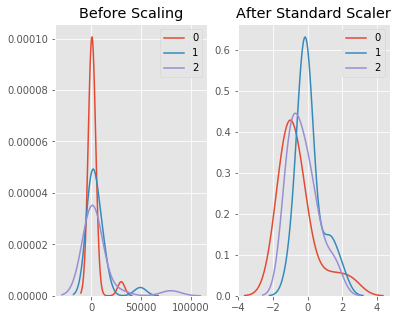

In [53]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')

sns.kdeplot(numericData.iloc[0], ax=ax1)
sns.kdeplot(numericData.iloc[1], ax=ax1)
sns.kdeplot(numericData.iloc[2], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(df_std.iloc[0], ax=ax2)
sns.kdeplot(df_std.iloc[1], ax=ax2)
sns.kdeplot(df_std.iloc[2], ax=ax2)

plt.show()

In [54]:
categData=clean_data[categList]
categData.head()

,grade,sub_grade,emp_title,home_ownership,verification_status,loan_status,purpose,addr_state
0,C,C4,Ryder,RENT,Source Verified,Charged Off,car,GA
1,C,C1,AIR RESOURCES BOARD,RENT,Source Verified,Fully Paid,other,CA
2,B,B5,University Medical Group,RENT,Source Verified,Fully Paid,other,OR
3,A,A4,Veolia Transportaton,RENT,Source Verified,Fully Paid,wedding,AZ
4,C,C5,Southern Star Photography,RENT,Not Verified,Fully Paid,debt_consolidation,NC


In [55]:
rawPurpose=categData['purpose'].value_counts()
print(rawPurpose)

debt_consolidation    18896
credit_card            5154
other                  4105
home_improvement       2964
major_purchase         2160
small_business         1617
car                    1527
wedding                 969
medical                 703
moving                  583
house                   392
educational             390
vacation                357
renewable_energy         92
Name: purpose, dtype: int64



#### Grouping loan purpose

In [56]:
groupBox =[]

homeLoan=['home','home_improvement','house','moving','major_purchases']
carLoan=['car']
creditcardLoan=['credit_card','debt_consolidation']
personalLoan=['wedding','medical','educational']
commercialLoan=['small_business','renewable_energy']

for purpose in categData['purpose'] :
    if purpose in homeLoan:
        groupBox.append('home')
    elif purpose in creditcardLoan:
        groupBox.append('credit_card')
    elif purpose in personalLoan:
        groupBox.append('personal')
    elif purpose in commercialLoan:
        groupBox.append('commerical')
    elif purpose in carLoan:
        groupBox.append('car')
    else:
        groupBox.append('other')

In [57]:
len(groupBox)

39909

In [58]:
categData_new=categData.copy()
categData_new['newPurpose']=groupBox
categData_new.drop(columns=['purpose'],inplace=True)

#### Grouping verification status

In [59]:
verify =[]

verified=['Verified','Source Verified']
not_verified=['Not Verified']


for case in categData_new['verification_status'] :
    if case in verified:
        verify.append('Verified')
    elif case in not_verified:
        verify.append('Not Verified')
    else:
        verify.append('n/a')

In [60]:
categData_new['verification']=verify
categData_new.head(10)

,grade,sub_grade,emp_title,home_ownership,verification_status,loan_status,addr_state,newPurpose,verification
0,C,C4,Ryder,RENT,Source Verified,Charged Off,GA,car,Verified
1,C,C1,AIR RESOURCES BOARD,RENT,Source Verified,Fully Paid,CA,other,Verified
2,B,B5,University Medical Group,RENT,Source Verified,Fully Paid,OR,other,Verified
3,A,A4,Veolia Transportaton,RENT,Source Verified,Fully Paid,AZ,personal,Verified
4,C,C5,Southern Star Photography,RENT,Not Verified,Fully Paid,NC,credit_card,Not Verified
5,E,E1,MKC Accounting,RENT,Source Verified,Fully Paid,CA,car,Verified
6,B,B5,Starbucks,RENT,Verified,Charged Off,TX,other,Verified
7,C,C3,Southwest Rural metro,OWN,Not Verified,Fully Paid,AZ,credit_card,Not Verified
8,B,B5,UCLA,OWN,Source Verified,Fully Paid,CA,credit_card,Verified
9,C,C1,Va. Dept of Conservation/Recreation,RENT,Source Verified,Charged Off,VA,credit_card,Verified


#### Grouping loan status

In [61]:
categData['loan_status'].value_counts()

Fully Paid                                             32135
Charged Off                                             5184
Does not meet the credit policy. Status:Fully Paid      1879
Does not meet the credit policy. Status:Charged Off      711
Name: loan_status, dtype: int64

In [62]:
cases=['Fully Paid','Charged Off']
defaulter =[]
for loan_case in categData['loan_status']:
    data=re.findall(r"(?=("+'|'.join(cases)+r"))",loan_case)
    if data == ['Fully Paid']:
        defaulter.append('No')
    elif data == ['Charged Off']:
        defaulter.append('Yes')
    else:
        defaulter.append('n/a')

In [63]:
categData_new['defaulter']=defaulter

In [64]:
categData_new['defaulter'].value_counts()

No     34014
Yes     5895
Name: defaulter, dtype: int64

In [65]:
categData_new.drop(columns=['verification_status','loan_status'],inplace=True)

In [66]:
categData_new.head().T

,0,1,2,3,4
grade,C,C,B,A,C
sub_grade,C4,C1,B5,A4,C5
emp_title,Ryder,AIR RESOURCES BOARD,University Medical Group,Veolia Transportaton,Southern Star Photography
home_ownership,RENT,RENT,RENT,RENT,RENT
addr_state,GA,CA,OR,AZ,NC
newPurpose,car,other,other,personal,credit_card
verification,Verified,Verified,Verified,Verified,Not Verified
defaulter,Yes,No,No,No,No


In [67]:
full_data=pd.concat([numericData,categData_new],axis=1)

In [68]:
full_std_data=pd.concat([df_std,categData_new],axis=1)

In [69]:
nanSummary(full_data)

'Data is now Clean'

In [70]:
nanSummary(full_std_data)

'Data is now Clean'

### Saving the Clean Dataset

In [71]:
full_data.to_pickle('full_data.pkl')

In [72]:
full_std_data.to_pickle('full_std_data.pkl')

In [73]:
df_std.to_pickle('standardized.pkl')

In [74]:
numericData.to_pickle('numeric_data.pkl')
categData_new.to_pickle('categ_data.pkl')